# Data Loading and File Verification

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Display message for clarity
print("\nDatasets successfully located!")

/kaggle/input/seconddataset/FEDFUNDS.csv
/kaggle/input/seconddataset/PCE.csv
/kaggle/input/seconddataset/UNRATE.csv
/kaggle/input/seconddataset/CPIAUCSL.csv
/kaggle/input/seconddataset/GDPC1.csv
/kaggle/input/seconddataset/PAYEMS.csv
/kaggle/input/seconddataset/HOUST.csv
/kaggle/input/seconddataset/RSXFS.csv
/kaggle/input/seconddataset/EFFR.csv

Datasets successfully located!


**Loading and Displaying Datasets**

In [2]:
# Import visualization library
import matplotlib.pyplot as plt

# Define file paths for the datasets
file_paths = {
    "FEDFUNDS": "/kaggle/input/seconddataset/FEDFUNDS.csv",
    "PCE": "/kaggle/input/seconddataset/PCE.csv",
    "UNRATE": "/kaggle/input/seconddataset/UNRATE.csv",
    "CPIAUCSL": "/kaggle/input/seconddataset/CPIAUCSL.csv",
    "GDPC1": "/kaggle/input/seconddataset/GDPC1.csv",
    "PAYEMS": "/kaggle/input/seconddataset/PAYEMS.csv",
    "HOUST": "/kaggle/input/seconddataset/HOUST.csv",
    "RSXFS": "/kaggle/input/seconddataset/RSXFS.csv",
    "EFFR": "/kaggle/input/seconddataset/EFFR.csv"
}

# Load datasets into pandas DataFrames
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display the first few rows of each dataset
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.head(), "\n")
    print("="*50)


Dataset: FEDFUNDS
         DATE  FEDFUNDS
0  1954-07-01      0.80
1  1954-08-01      1.22
2  1954-09-01      1.07
3  1954-10-01      0.85
4  1954-11-01      0.83 

Dataset: PCE
         DATE    PCE
0  1959-01-01  306.1
1  1959-02-01  309.6
2  1959-03-01  312.7
3  1959-04-01  312.2
4  1959-05-01  316.1 

Dataset: UNRATE
         DATE  UNRATE
0  1948-01-01     3.4
1  1948-02-01     3.8
2  1948-03-01     4.0
3  1948-04-01     3.9
4  1948-05-01     3.5 

Dataset: CPIAUCSL
         DATE  CPIAUCSL
0  1947-01-01     21.48
1  1947-02-01     21.62
2  1947-03-01     22.00
3  1947-04-01     22.00
4  1947-05-01     21.95 

Dataset: GDPC1
         DATE     GDPC1
0  1947-01-01  2182.681
1  1947-04-01  2176.892
2  1947-07-01  2172.432
3  1947-10-01  2206.452
4  1948-01-01  2239.682 

Dataset: PAYEMS
         DATE  PAYEMS
0  1939-01-01   29923
1  1939-02-01   30100
2  1939-03-01   30280
3  1939-04-01   30094
4  1939-05-01   30299 

Dataset: HOUST
         DATE   HOUST
0  1959-01-01  1657.0
1  1959-02-

**Standardizing Column Names and Ensuring Date Conversion**

In [3]:
# Standardize column names and convert dates
for name, df in datasets.items():
    # Ensure "Date" column is standardized
    if "DATE" in df.columns or "date" in df.columns:
        df.rename(columns={"DATE": "Date", "date": "Date"}, inplace=True)
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Convert to datetime format
    
    # Log the status for each dataset
    print(f"Dataset '{name}' standardized. First 5 rows:")
    print(df.head(), "\n")


Dataset 'FEDFUNDS' standardized. First 5 rows:
        Date  FEDFUNDS
0 1954-07-01      0.80
1 1954-08-01      1.22
2 1954-09-01      1.07
3 1954-10-01      0.85
4 1954-11-01      0.83 

Dataset 'PCE' standardized. First 5 rows:
        Date    PCE
0 1959-01-01  306.1
1 1959-02-01  309.6
2 1959-03-01  312.7
3 1959-04-01  312.2
4 1959-05-01  316.1 

Dataset 'UNRATE' standardized. First 5 rows:
        Date  UNRATE
0 1948-01-01     3.4
1 1948-02-01     3.8
2 1948-03-01     4.0
3 1948-04-01     3.9
4 1948-05-01     3.5 

Dataset 'CPIAUCSL' standardized. First 5 rows:
        Date  CPIAUCSL
0 1947-01-01     21.48
1 1947-02-01     21.62
2 1947-03-01     22.00
3 1947-04-01     22.00
4 1947-05-01     21.95 

Dataset 'GDPC1' standardized. First 5 rows:
        Date     GDPC1
0 1947-01-01  2182.681
1 1947-04-01  2176.892
2 1947-07-01  2172.432
3 1947-10-01  2206.452
4 1948-01-01  2239.682 

Dataset 'PAYEMS' standardized. First 5 rows:
        Date  PAYEMS
0 1939-01-01   29923
1 1939-02-01   301

**Merging Datasets**

In [4]:
# Initialize merged_data with the first dataset
merged_data = None
for name, df in datasets.items():
    # Log the merging progress
    print(f"Merging dataset: {name}")
    if merged_data is None:
        merged_data = df  # Start with the first dataset
    else:
        merged_data = pd.merge(merged_data, df, on="Date", how="outer")

# Log the summary of the merged dataset
print("\nMerged Dataset Summary:")
print(merged_data.info())

Merging dataset: FEDFUNDS
Merging dataset: PCE
Merging dataset: UNRATE
Merging dataset: CPIAUCSL
Merging dataset: GDPC1
Merging dataset: PAYEMS
Merging dataset: HOUST
Merging dataset: RSXFS
Merging dataset: EFFR

Merged Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2293 non-null   datetime64[ns]
 1   FEDFUNDS  845 non-null    float64       
 2   PCE       790 non-null    float64       
 3   UNRATE    923 non-null    float64       
 4   CPIAUCSL  934 non-null    float64       
 5   GDPC1     311 non-null    float64       
 6   PAYEMS    1031 non-null   float64       
 7   HOUST     790 non-null    float64       
 8   RSXFS     394 non-null    float64       
 9   EFFR      1306 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 179.3+ KB
None


**Displaying the Merged Dataset**

In [5]:
# Display a concise summary of the merged dataset
print("Merged Dataset Overview:")
print(merged_data.info())  # Summary of the dataset structure

# Display the first few rows to preview the data
print("\nSample of Merged Dataset:")
print(merged_data.head())  # First 5 rows for inspection

# Display the column names to ensure correct alignment of datasets
print("\nColumn Names in Merged Dataset:")
print(merged_data.columns.tolist())


Merged Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2293 non-null   datetime64[ns]
 1   FEDFUNDS  845 non-null    float64       
 2   PCE       790 non-null    float64       
 3   UNRATE    923 non-null    float64       
 4   CPIAUCSL  934 non-null    float64       
 5   GDPC1     311 non-null    float64       
 6   PAYEMS    1031 non-null   float64       
 7   HOUST     790 non-null    float64       
 8   RSXFS     394 non-null    float64       
 9   EFFR      1306 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 179.3+ KB
None

Sample of Merged Dataset:
        Date  FEDFUNDS  PCE  UNRATE  CPIAUCSL  GDPC1   PAYEMS  HOUST  RSXFS  \
0 1939-01-01       NaN  NaN     NaN       NaN    NaN  29923.0    NaN    NaN   
1 1939-02-01       NaN  NaN     NaN       NaN    NaN 

**Handling Missing Values**

Missing Values Summary:
Date           0
FEDFUNDS    1448
PCE         1503
UNRATE      1370
CPIAUCSL    1359
GDPC1       1982
PAYEMS      1262
HOUST       1503
RSXFS       1899
EFFR         987
dtype: int64

Missing Values as Percentage of Total Rows:
Date         0.000000
FEDFUNDS    63.148713
PCE         65.547318
UNRATE      59.747056
CPIAUCSL    59.267335
GDPC1       86.436982
PAYEMS      55.037069
HOUST       65.547318
RSXFS       82.817270
EFFR        43.044047
dtype: float64


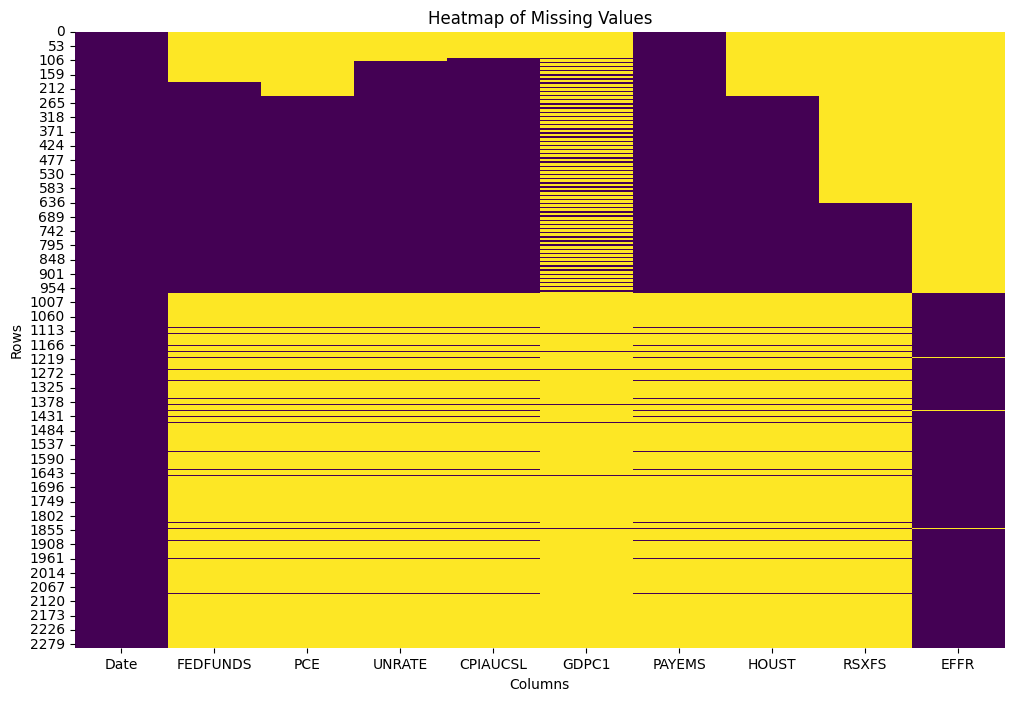

In [6]:
# Check for missing values in the merged dataset
print("Missing Values Summary:")
missing_values = merged_data.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(merged_data)) * 100
print("\nMissing Values as Percentage of Total Rows:")
print(missing_percentage)

# Visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(merged_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


**Handling Missing Values**

In [7]:
merged_data = merged_data.infer_objects()  # Convert object columns to appropriate types


for column in merged_data.columns:
    if column != "Date":  
        merged_data[column] = pd.to_numeric(merged_data[column], errors="coerce")

# Fill missing values using linear interpolation
merged_data.interpolate(method="linear", inplace=True)

# Check missing values after interpolation
print("\nMissing Values After Interpolation:")
print(merged_data.isnull().sum())


if merged_data.isnull().sum().sum() > 0:
    merged_data.ffill(inplace=True) 
    merged_data.bfill(inplace=True)  

# Verify no missing values remain
print("\nFinal Missing Values Check:")
print(merged_data.isnull().sum())



Missing Values After Interpolation:
Date          0
FEDFUNDS    186
PCE         240
UNRATE      108
CPIAUCSL     96
GDPC1        96
PAYEMS        0
HOUST       240
RSXFS       636
EFFR        972
dtype: int64

Final Missing Values Check:
Date        0
FEDFUNDS    0
PCE         0
UNRATE      0
CPIAUCSL    0
GDPC1       0
PAYEMS      0
HOUST       0
RSXFS       0
EFFR        0
dtype: int64


# Exploratory Data Analysis (EDA)

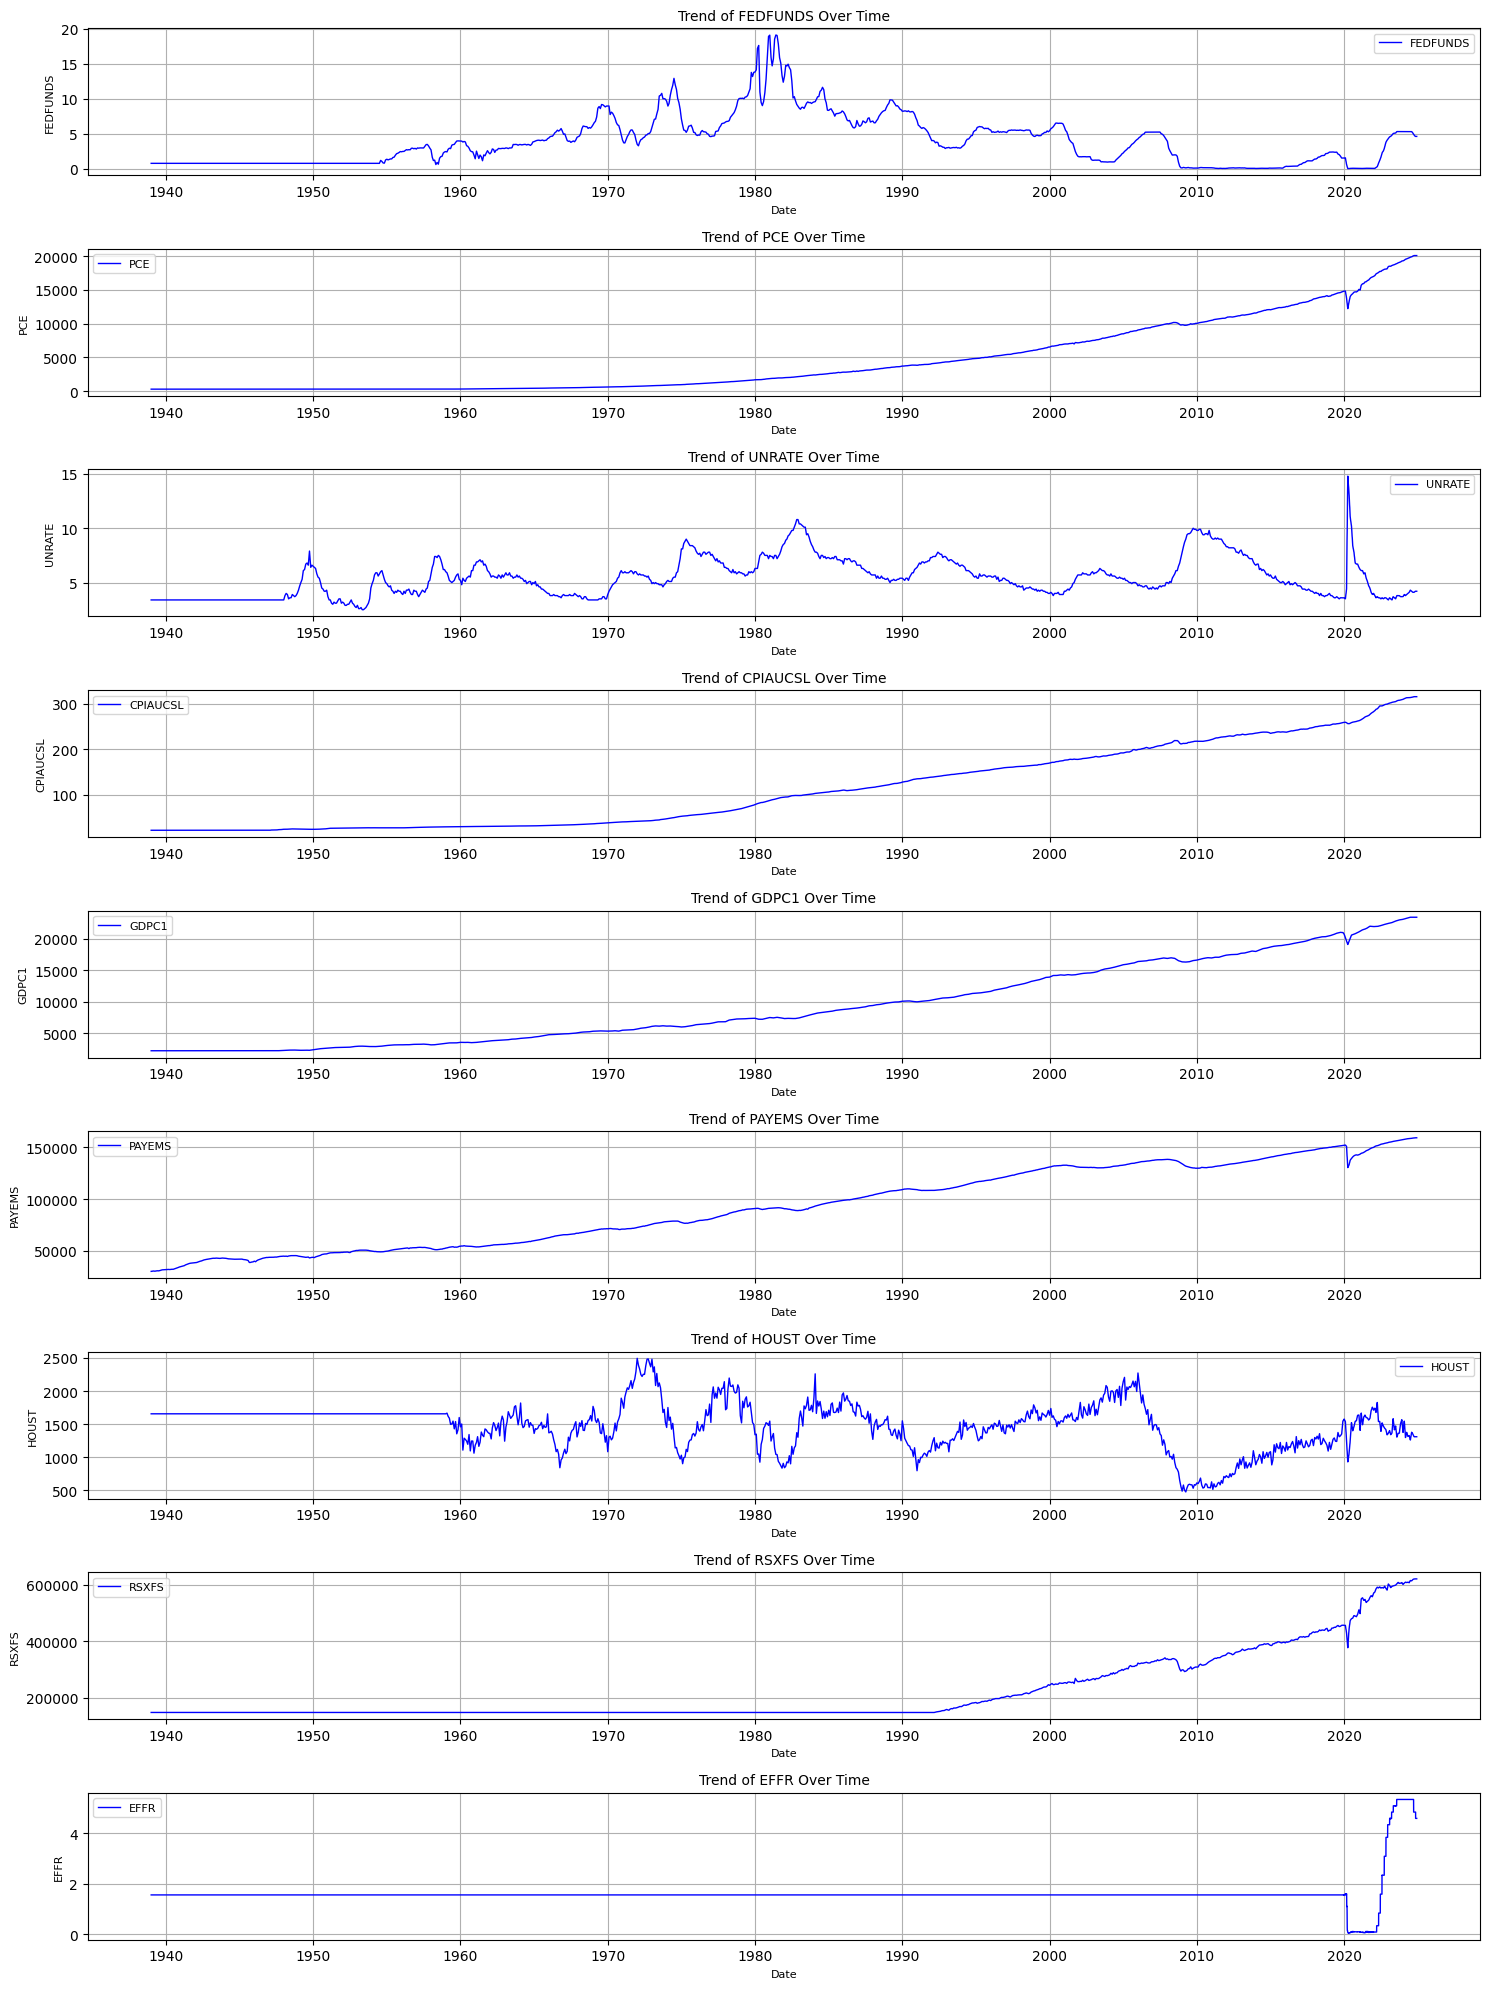

In [8]:
import matplotlib.pyplot as plt

# Set up the plotting area with subplots
plt.figure(figsize=(15, 20))

for i, column in enumerate(merged_data.columns[1:], 1):  # Exclude the 'Date' column
    plt.subplot(len(merged_data.columns) - 1, 1, i)
    plt.plot(merged_data["Date"], merged_data[column], label=column, color='blue', linewidth=1)
    plt.title(f"Trend of {column} Over Time", fontsize=10)
    plt.xlabel("Date", fontsize=8)
    plt.ylabel(column, fontsize=8)
    plt.legend(fontsize=8)
    plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plots
plt.show()


**Summary Statistics and Histograms Code**

Summary Statistics:
                                Date     FEDFUNDS           PCE       UNRATE  \
count                           2293  2293.000000   2293.000000  2293.000000   
mean   2004-03-18 10:18:34.696903552     3.110938  11550.116594     5.169538   
min              1939-01-01 00:00:00     0.050000    306.100000     2.500000   
25%              1986-10-01 00:00:00     0.170000   2932.900000     3.676190   
50%              2020-08-01 00:00:00     2.610000  14711.613636     4.247826   
75%              2022-10-04 00:00:00     5.300000  18094.200000     6.100000   
max              2024-12-05 00:00:00    19.100000  20099.500000    14.800000   
std                              NaN     3.022816   7400.790603     2.061859   

          CPIAUCSL         GDPC1         PAYEMS        HOUST          RSXFS  \
count  2293.000000   2293.000000    2293.000000  2293.000000    2293.000000   
mean    208.742724  16327.826107  124780.824030  1473.876363  407146.319669   
min      21.480000   2

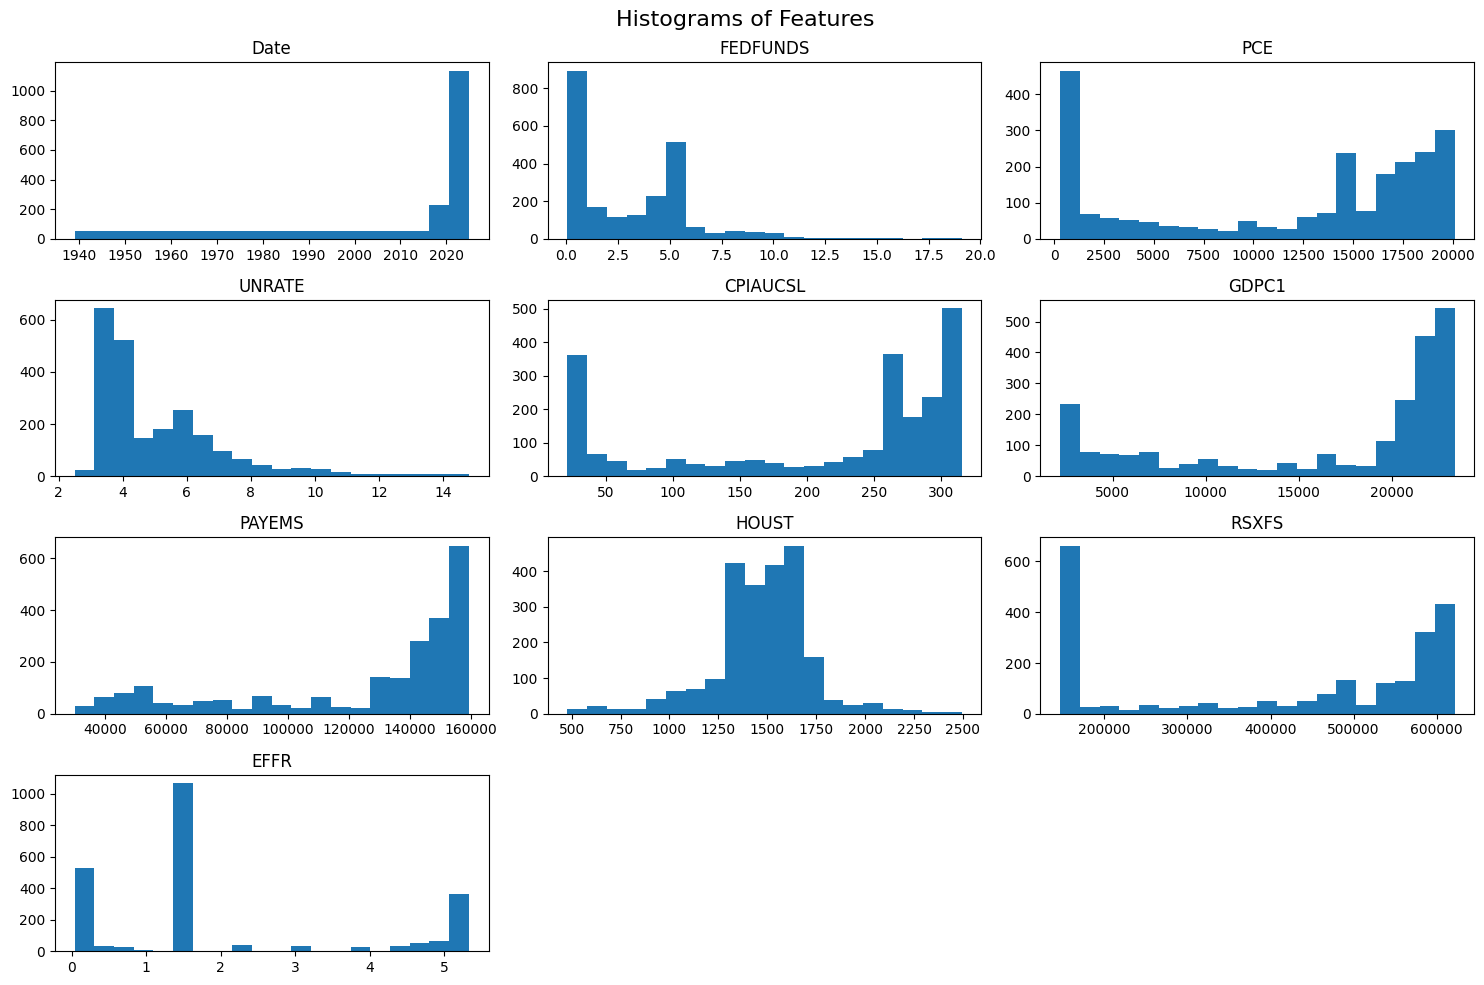

In [9]:
# Generate summary statistics
print("Summary Statistics:")
print(merged_data.describe())

# Plot histograms for all features
merged_data.hist(bins=20, figsize=(15, 10), grid=False)
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

**Correlation Matrix**

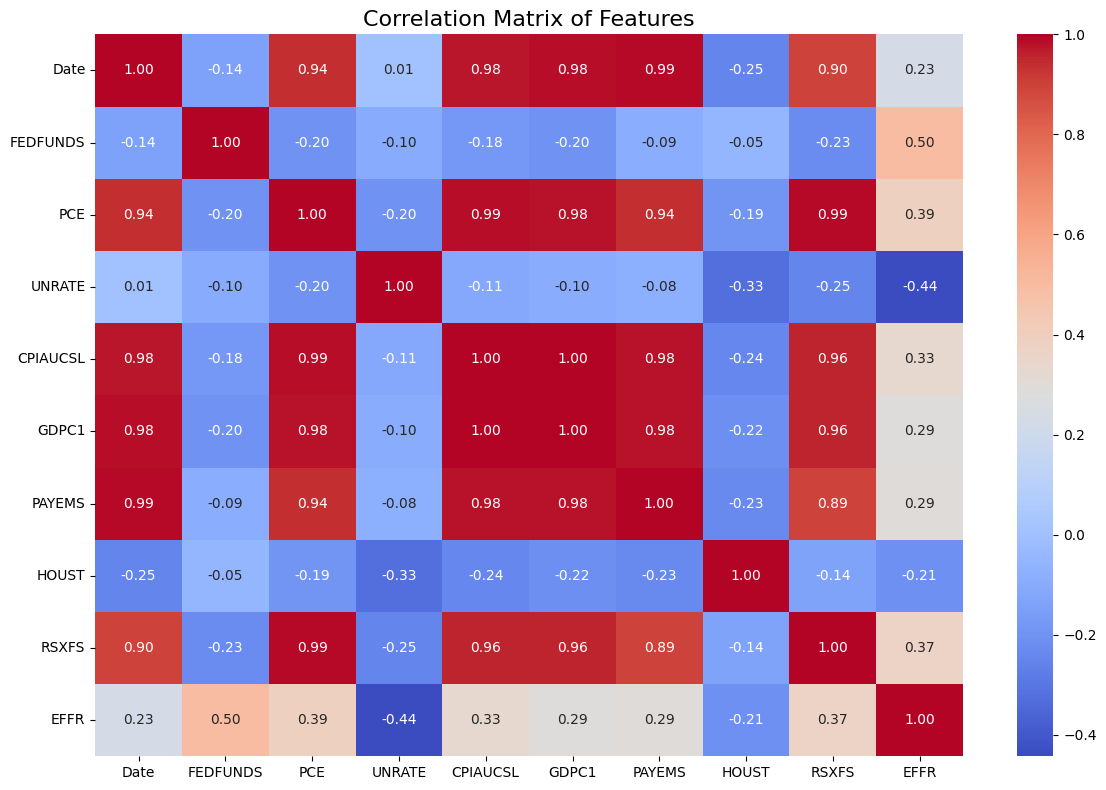

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.tight_layout()
plt.show()


# Feature Engineering

In [11]:
def assign_rate_adjustment(change):
    if change <= -0.50:
        return '-0.50%'
    elif -0.50 < change <= -0.25:
        return '-0.25%'
    elif -0.25 < change <= 0.25:
        return '0%'
    elif 0.25 < change <= 0.50:
        return '+0.25%'
    elif change > 0.50:
        return '+0.50%'
    else:
        return None

# Calculate EFFR_Change if it doesn't already exist
if 'EFFR_Change' not in merged_data.columns:
    merged_data['EFFR_Change'] = merged_data['EFFR'].diff()

# Apply the function to create the Rate_Adjustment column
merged_data['Rate_Adjustment'] = merged_data['EFFR_Change'].apply(assign_rate_adjustment)

# Ensure the Rate_Adjustment column is categorical
merged_data['Rate_Adjustment'] = pd.Categorical(
    merged_data['Rate_Adjustment'], 
    categories=['-0.50%', '-0.25%', '0%', '+0.25%', '+0.50%'], 
    ordered=True
)

# Check the distribution of the target variable
print("Target Variable Distribution:")
print(merged_data['Rate_Adjustment'].value_counts())

# Drop rows where Rate_Adjustment is NaN
merged_data.dropna(subset=['Rate_Adjustment'], inplace=True)

# Verify the dataset after adding Rate_Adjustment
print("\nDataset Info After Adding Rate_Adjustment:")
print(merged_data.info())


Target Variable Distribution:
Rate_Adjustment
0%        2282
+0.50%       4
-0.50%       3
+0.25%       2
-0.25%       1
Name: count, dtype: int64

Dataset Info After Adding Rate_Adjustment:
<class 'pandas.core.frame.DataFrame'>
Index: 2292 entries, 1 to 2292
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2292 non-null   datetime64[ns]
 1   FEDFUNDS         2292 non-null   float64       
 2   PCE              2292 non-null   float64       
 3   UNRATE           2292 non-null   float64       
 4   CPIAUCSL         2292 non-null   float64       
 5   GDPC1            2292 non-null   float64       
 6   PAYEMS           2292 non-null   float64       
 7   HOUST            2292 non-null   float64       
 8   RSXFS            2292 non-null   float64       
 9   EFFR             2292 non-null   float64       
 10  EFFR_Change      2292 non-null   float64       
 11  Rate_Adjustme

**Realistic Resampling**

In [12]:
from sklearn.utils import resample

# Current class distribution
class_distribution = merged_data['Rate_Adjustment'].value_counts(normalize=True)
print("Current Class Distribution (Proportions):")
print(class_distribution)

# Define target proportions (realistic values)
target_proportions = {
    '0%': 0.3,          
    '+0.50%': 0.2,
    '-0.50%': 0.1,
    '+0.25%': 0.22,
    '-0.25%': 0.18
}

# Determine target sample sizes
total_samples = len(merged_data)
target_sample_sizes = {
    cls: int(total_samples * proportion)
    for cls, proportion in target_proportions.items()
}
print("\nTarget Sample Sizes:")
print(target_sample_sizes)

# Separate data by classes
data_by_class = {
    cls: merged_data[merged_data['Rate_Adjustment'] == cls]
    for cls in target_proportions.keys()
}

# Resample each class
resampled_data = []
for cls, target_size in target_sample_sizes.items():
    if len(data_by_class[cls]) > target_size:
        # Undersample majority class
        resampled = resample(
            data_by_class[cls],
            replace=False,
            n_samples=target_size,
            random_state=42
        )
    else:
        # Oversample minority class
        resampled = resample(
            data_by_class[cls],
            replace=True,
            n_samples=target_size,
            random_state=42
        )
    resampled_data.append(resampled)

# Combine all resampled classes
balanced_data = pd.concat(resampled_data)

# Verify the new distribution
print("\nBalanced Class Distribution:")
print(balanced_data['Rate_Adjustment'].value_counts())

# Display the head of the balanced dataset
print("\nBalanced Data Head:")
print(balanced_data.head())


Current Class Distribution (Proportions):
Rate_Adjustment
0%        0.995637
+0.50%    0.001745
-0.50%    0.001309
+0.25%    0.000873
-0.25%    0.000436
Name: proportion, dtype: float64

Target Sample Sizes:
{'0%': 687, '+0.50%': 458, '-0.50%': 229, '+0.25%': 504, '-0.25%': 412}

Balanced Class Distribution:
Rate_Adjustment
0%        687
+0.25%    504
+0.50%    458
-0.25%    412
-0.50%    229
Name: count, dtype: int64

Balanced Data Head:
           Date  FEDFUNDS           PCE    UNRATE    CPIAUCSL         GDPC1  \
1271 2021-01-21  0.083333  15016.766667  6.266667  263.228000  21130.703438   
1637 2022-06-13  1.380909  17746.290909  3.563636  294.989091  22035.482970   
701  1997-06-01  5.560000   5494.200000  5.000000  160.200000  12419.747000   
2037 2023-12-18  5.330000  19299.642857  3.700000  309.235952  23039.462424   
597  1988-10-01  8.300000   3413.700000  5.400000  119.900000   9673.405000   

             PAYEMS        HOUST          RSXFS  EFFR  EFFR_Change  \
1271  143267

In [13]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

# Define majority and minority
majority = merged_data[merged_data["Rate_Adjustment"] == "0%"]
minority = merged_data[merged_data["Rate_Adjustment"] != "0%"]

# Define minority classes
minority_classes = minority["Rate_Adjustment"].unique()

# Adjusted resampling with less perfect balancing
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=int(len(majority) * 0.6),  
    random_state=42
)

minority_upsampled = pd.concat([
    resample(
        minority[minority["Rate_Adjustment"] == label],
        replace=True,
        n_samples=int(len(majority_downsampled) * 0.6),  
        random_state=42
    )
    for label in minority_classes
])

# Combine the datasets
adjusted_data = pd.concat([majority_downsampled, minority_upsampled])

# Add noise to numerical features
numeric_features = adjusted_data.select_dtypes(include=["float64", "int64"]).columns
noise_factor = 0.02  # Adjust the noise factor as needed

for feature in numeric_features:
    noise = np.random.normal(0, noise_factor, size=adjusted_data[feature].shape)
    adjusted_data[feature] = adjusted_data[feature] + noise

# Ensure no negative values (if applicable)
for feature in numeric_features:
    adjusted_data[feature] = adjusted_data[feature].clip(lower=0)

# Check the final distribution and dataset
print("Adjusted Target Distribution with Noise:")
print(adjusted_data["Rate_Adjustment"].value_counts())

print("\nDataset with Noise:")
print(adjusted_data.head())


Adjusted Target Distribution with Noise:
Rate_Adjustment
0%        1369
-0.50%     821
-0.25%     821
+0.25%     821
+0.50%     821
Name: count, dtype: int64

Dataset with Noise:
           Date  FEDFUNDS           PCE    UNRATE    CPIAUCSL         GDPC1  \
1271 2021-01-21  0.088247  15016.759343  6.304676  263.250522  21130.690236   
1637 2022-06-13  1.358701  17746.256667  3.559170  295.009678  22035.471772   
701  1997-06-01  5.560933   5494.212729  4.980646  160.174430  12419.761379   
2037 2023-12-18  5.314520  19299.641325  3.717664  309.235900  23039.461275   
597  1988-10-01  8.292362   3413.683383  5.398279  119.898444   9673.405109   

             PAYEMS        HOUST          RSXFS      EFFR  EFFR_Change  \
1271  143267.349348  1484.328497  502697.688435  0.062532     0.000000   
1637  152598.913828  1487.425678  591788.739310  0.875762     0.000000   
701   122815.963197  1494.011080  204675.025515  1.513746     0.010574   
2037  157438.115316  1467.414112  605163.397520  5

# Splitting Data into Training and Testing Sets

In [14]:
from sklearn.model_selection import train_test_split

# Drop 'Date' and 'Rate_Adjustment' from the feature set
X = adjusted_data.drop(columns=["Date", "EFFR_Change", "Rate_Adjustment"])  # Features
y = adjusted_data["Rate_Adjustment"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify the split
print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])



Training Set Size: 3722
Testing Set Size: 931


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with class weighting
class_weights = {
    '-0.50%': 1.0,
    '-0.25%': 1.0,
    '0%': 1.0,
    '+0.25%': 1.0,
    '+0.50%': 1.0,
}

clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weights
)

# Train the model
clf.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      +0.25%       1.00      1.00      1.00       164
      +0.50%       0.99      1.00      1.00       164
      -0.25%       0.98      1.00      0.99       165
      -0.50%       0.99      1.00      1.00       164
          0%       1.00      0.98      0.99       274

    accuracy                           0.99       931
   macro avg       0.99      1.00      1.00       931
weighted avg       0.99      0.99      0.99       931


Accuracy Score:
0.9946294307196563


<Figure size 1000x800 with 0 Axes>

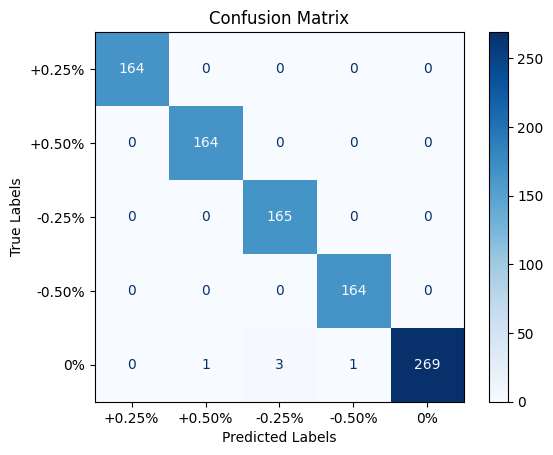

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [19]:
import pandas as pd

# Hardcoded rates for testing
real_data_input = {
    "FEDFUNDS": 1.5,  # Example value
    "PCE": 320.0,     # Example value
    "UNRATE": 3.5,    # Example value
    "CPIAUCSL": 150.0, # Example value
    "GDPC1": 22000.0, # Example value
    "PAYEMS": 300000.0, # Example value
    "HOUST": 1500.0,  # Example value
    "RSXFS": 40000.0, # Example value
    "EFFR": 0.75      # Example value
}

# Convert input to DataFrame
real_data_df = pd.DataFrame([real_data_input])

# Predict the rate adjustment
predicted_class = clf.predict(real_data_df)[0]
class_probabilities = clf.predict_proba(real_data_df)[0]

# Map the class probabilities to column names
probability_dict = {
    "Probability -0.50%": class_probabilities[clf.classes_.tolist().index("-0.50%")],
    "Probability -0.25%": class_probabilities[clf.classes_.tolist().index("-0.25%")],
    "Probability 0%": class_probabilities[clf.classes_.tolist().index("0%")],
    "Probability +0.25%": class_probabilities[clf.classes_.tolist().index("+0.25%")],
    "Probability +0.50%": class_probabilities[clf.classes_.tolist().index("+0.50%")],
}

# Combine predictions with Desights_ID
desights_id = "D001"  # Example Desights_ID
submission_data = {
    "Desights_ID": desights_id,
    "Predicted_Class": predicted_class,
    **probability_dict,
}

# Print results directly
print("Prediction Results:")
print(f"Predicted Class: {submission_data['Predicted_Class']}")
for prob_label, prob_value in probability_dict.items():
    print(f"{prob_label}: {prob_value:.2f}")


Prediction Results:
Predicted Class: 0%
Probability -0.50%: 0.02
Probability -0.25%: 0.23
Probability 0%: 0.55
Probability +0.25%: 0.19
Probability +0.50%: 0.01
